# Compute enrichments of motif families in different cancer types / samples


In [ ]:
%matplotlib inline
from seq2atac.stable import read_pickle
from helper_utils import viz_compare_enrich, chi2ovr

## Individual BRCA samples

In [2]:
cleaned_motifs_brca = 'cleaned_instances_brca.pkl' ### TODO

In [3]:
# specify groups

groups = {'luminal': ['brca{}'.format(n) for n in ['10', '12', '15', '20', '22', ]],
          'basal': ['brca{}'.format(n) for n in ['14', '16', '23', '24', '25', ]],
          'her2': ['brca{}'.format(n) for n in ['11', '13', '17', '18', '19', '21', ]]}

sample2grp = {}
for k, v in groups.items():
    for s in v:
        sample2grp[s] = '{}.{}'.format(k, s.split('brca')[-1])
sample2grp

{'brca10': 'luminal.10',
 'brca12': 'luminal.12',
 'brca15': 'luminal.15',
 'brca20': 'luminal.20',
 'brca22': 'luminal.22',
 'brca14': 'basal.14',
 'brca16': 'basal.16',
 'brca23': 'basal.23',
 'brca24': 'basal.24',
 'brca25': 'basal.25',
 'brca11': 'her2.11',
 'brca13': 'her2.13',
 'brca17': 'her2.17',
 'brca18': 'her2.18',
 'brca19': 'her2.19',
 'brca21': 'her2.21'}

In [4]:
## 2. enrichment test
enrich_df = read_pickle(cleaned_motifs_brca)
enrich_out = chi2ovr(
    data=enrich_df,
    groups=None,
    notB_key='end_cnt_before', 
    B_key='end_cnt_after',
    return_df=True,
    verbose=True,
    name_key='modified_names',
    )
print('pct significant: {:.2f}'.format(100*(enrich_out['p_bonferonni'] < 0.5).sum()/enrich_out.shape[0]))

data merged into one df in 34-s
through brca10. time elapsed: 35-s
through brca11. time elapsed: 35-s
through brca12. time elapsed: 35-s
through brca13. time elapsed: 35-s
through brca14. time elapsed: 35-s
through brca15. time elapsed: 35-s
through brca16. time elapsed: 35-s
through brca17. time elapsed: 35-s
through brca18. time elapsed: 35-s
through brca19. time elapsed: 35-s
through brca20. time elapsed: 35-s
through brca21. time elapsed: 36-s
through brca22. time elapsed: 36-s
through brca23. time elapsed: 36-s
through brca24. time elapsed: 36-s
through brca25. time elapsed: 36-s
n_tst: 4512
pct significant: 66.40


In [5]:
## 3. visualize
agg = viz_compare_enrich(enrich_out, name_key='modified_names', drop_duplicates_key='modified_names', names2display=sample2grp)
agg

,modified_names,p_chi2,OR,sample,p_bonferonni,sample2
0,FOX/4,0.000000e+00,1.286587,brca10,0.000000e+00,luminal.10
1,FOX/5,0.000000e+00,1.281843,brca10,0.000000e+00,luminal.10
2,GC-tract,0.000000e+00,0.926368,brca10,0.000000e+00,luminal.10
3,CCAAT/CEBP,0.000000e+00,0.506255,brca10,0.000000e+00,luminal.10
4,KLF/SP/2,1.050775e-311,0.938397,brca10,4.741096e-308,luminal.10
...,...,...,...,...,...,...
811,CREB/ATF/1,5.841132e-06,1.047281,brca25,2.635519e-02,basal.25
812,SMAD,5.937564e-06,0.976011,brca25,2.679029e-02,basal.25
813,ETS/1,1.391125e-03,0.981970,brca25,6.276755e+00,basal.25
814,IRF/1,1.058550e-01,1.018667,brca25,4.776176e+02,basal.25


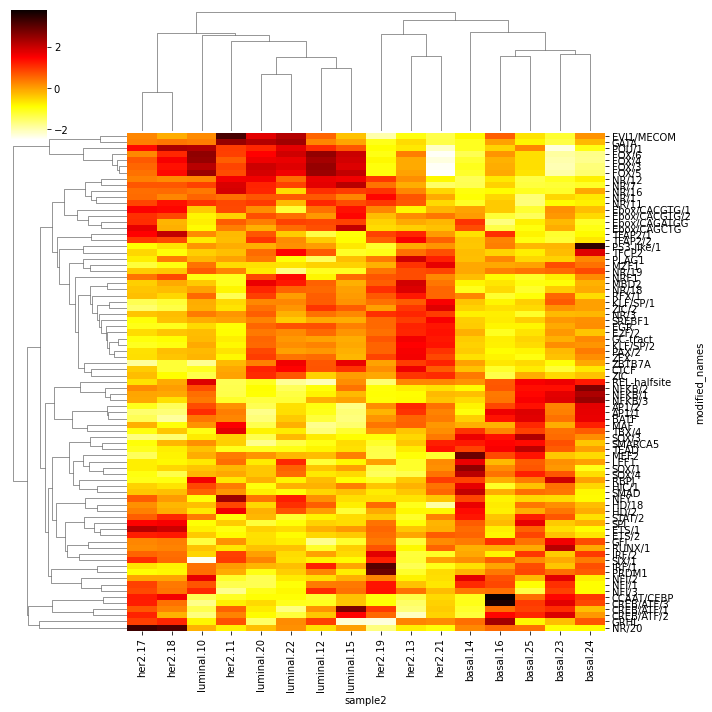

In [6]:
grid ={'zscore': ['rowcol',],
       'topn': [20],
       'drop': ['ZNF']}


zscore_type = 'rowcol'
n = 20
drop_motif = 'ZNF'

agg, p, dt = viz_compare_enrich(
    enrich_out, 
    name_key='modified_names', 
    drop_duplicates_key='modified_names', 
    names2display=sample2grp,
    topn=n,
    drop=drop_motif,
    zscore=zscore_type,
    save_plot=None,
    save_mat=None,
    return_plot_obj=True,
)



In [7]:
print(p.dendrogram_row.reordered_ind)
print(p.dendrogram_col.reordered_ind)
print(dt["df_plot"].index[p.dendrogram_row.reordered_ind])
print(dt["df_plot"].columns[p.dendrogram_col.reordered_ind])

[12, 21, 57, 20, 18, 17, 19, 46, 52, 47, 44, 45, 13, 14, 15, 16, 74, 75, 54, 76, 56, 36, 49, 53, 34, 48, 61, 30, 80, 51, 70, 9, 8, 22, 31, 55, 78, 77, 7, 79, 60, 41, 40, 42, 1, 0, 2, 33, 72, 67, 65, 73, 35, 32, 66, 68, 59, 27, 64, 43, 25, 26, 71, 69, 10, 11, 23, 62, 29, 63, 28, 58, 38, 37, 39, 3, 6, 4, 5, 24, 50]
[7, 8, 11, 5, 14, 15, 12, 13, 9, 6, 10, 0, 1, 4, 2, 3]
Index(['EVI1/MECOM', 'GATA', 'POU/1', 'FOX/6', 'FOX/4', 'FOX/3', 'FOX/5',
       'NR/12', 'NR/7', 'NR/16', 'NR/1', 'NR/11', 'Ebox/CACGTG/1',
       'Ebox/CACGTG/2', 'Ebox/CAGATGG', 'Ebox/CAGCTG', 'TFAP2/1', 'TFAP2/2',
       'P53-like/1', 'TFCP2', 'PLAG1', 'MZF1', 'NR/19', 'NRF1', 'MBD2',
       'NR/18', 'RFX/1', 'KLF/SP/1', 'ZIC/2', 'NR/3', 'SREBF1', 'EGR', 'E2F/2',
       'GC-tract', 'KLF/SP/2', 'PAX/2', 'ZFX', 'ZBTB7A', 'CTCF', 'ZIC',
       'REL-halfsite', 'NFKB/2', 'NFKB/1', 'NFKB/3', 'AP1/2', 'AP1/1', 'BATF',
       'MAF', 'TBX/4', 'SOX/3', 'SMARCA5', 'TEAD', 'MEF2', 'LEF1', 'SOX/1',
       'SOX/4', 'RBPJ', 'HIC/1', 

# Cancer samples

In [8]:
cleaned_motifs_cancer = "cleaned_instances_cancer.pkl" ### TODO


In [10]:
## 2. enrichment test
enrich_df = read_pickle(cleaned_motifs_cancer)
enrich_out = chi2ovr(
    data=enrich_df,
    groups=None,
    notB_key='end_cnt_before', 
    B_key='end_cnt_after',
    return_df=True,
    verbose=True,
    name_key='modified_names',
    )
print('pct significant: {:.2f}'.format(100*(enrich_out['p_bonferonni'] < 0.5).sum()/enrich_out.shape[0]))

        

data merged into one df in 56-s
through brca. time elapsed: 56-s
through gbm. time elapsed: 56-s
through coad. time elapsed: 56-s
through luad. time elapsed: 56-s
through skcm. time elapsed: 57-s
through kirp. time elapsed: 57-s
through kirc. time elapsed: 57-s
through blca. time elapsed: 57-s
n_tst: 2256
pct significant: 79.83


In [11]:
## 3. visualize
agg = viz_compare_enrich(enrich_out, name_key='modified_names', drop_duplicates_key='modified_names')
agg

,modified_names,p_chi2,OR,sample,p_bonferonni
0,P53-like/1,0.000000e+00,1.691950,blca,0.000000
1,GRHL,0.000000e+00,1.683910,blca,0.000000
2,TFCP2,0.000000e+00,1.375563,blca,0.000000
3,ETS/1,0.000000e+00,1.260021,blca,0.000000
4,SPI,0.000000e+00,1.231284,blca,0.000000
...,...,...,...,...,...
459,HD/17,1.101986e-07,0.939755,skcm,0.000249
460,HD/18,1.452420e-07,0.973936,skcm,0.000328
461,MAF,1.873430e-02,1.010803,skcm,42.264591
462,TEAD,9.746056e-02,0.990847,skcm,219.871023


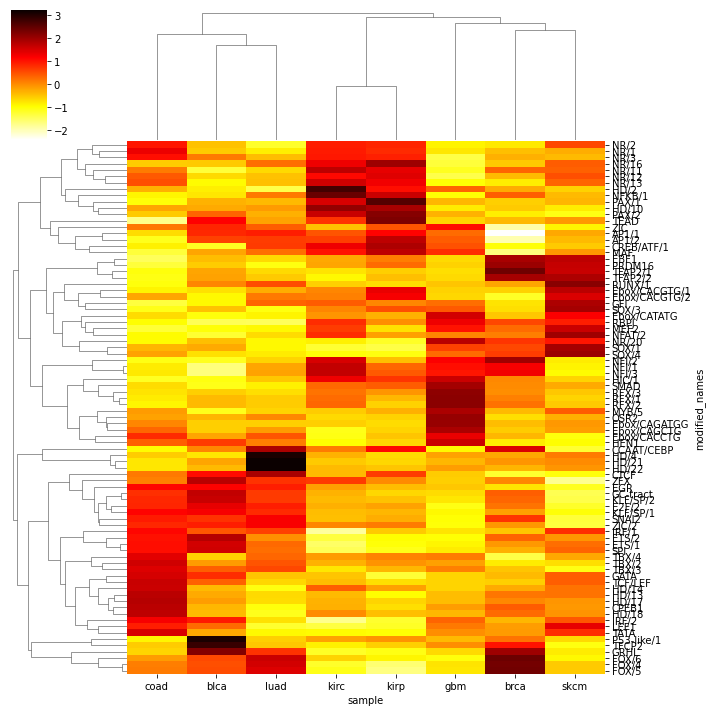

In [12]:
zscore_type = 'rowcol'
n = 20
drop_motif = 'ZNF'

agg, p, dt = viz_compare_enrich(
    enrich_out, 
    name_key='modified_names', 
    drop_duplicates_key='modified_names', 
    names2display=None,
    topn=n,
    drop=drop_motif,
    zscore=zscore_type,
    save_plot=None,
    save_mat=None,
    return_plot_obj=True,
)


In [13]:
print(p.dendrogram_row.reordered_ind)
print(p.dendrogram_col.reordered_ind)
print(dt["df_plot"].index[p.dendrogram_row.reordered_ind])
print(dt["df_plot"].columns[p.dendrogram_col.reordered_ind])

[53, 48, 55, 52, 49, 50, 51, 29, 47, 58, 24, 59, 77, 82, 0, 1, 4, 40, 7, 60, 78, 79, 65, 12, 13, 22, 69, 16, 61, 41, 43, 54, 68, 70, 45, 44, 46, 34, 66, 64, 62, 63, 42, 56, 14, 15, 11, 33, 2, 32, 30, 31, 5, 81, 8, 21, 38, 6, 37, 67, 83, 35, 10, 9, 71, 75, 73, 74, 20, 76, 26, 25, 27, 3, 28, 36, 39, 72, 57, 80, 23, 19, 17, 18]
[2, 0, 6, 4, 5, 3, 1, 7]
Index(['NR/2', 'NR/1', 'NR/3', 'NR/16', 'NR/11', 'NR/12', 'NR/13', 'HD/2',
       'NFKB/1', 'PAX/1', 'HD/10', 'PAX/2', 'TEAD', 'ZIC', 'AP1/1', 'AP1/2',
       'CREB/ATF/1', 'MAF', 'EBF1', 'PRDM16', 'TFAP2/1', 'TFAP2/2', 'RUNX/1',
       'Ebox/CACGTG/1', 'Ebox/CACGTG/2', 'GFI', 'SOX/3', 'Ebox/CATATG', 'RBPJ',
       'MEF2', 'NFAT/2', 'NR/20', 'SOX/1', 'SOX/4', 'NFI/2', 'NFI/1', 'NFI/3',
       'HIC/1', 'SMAD', 'RFX/3', 'RFX/1', 'RFX/2', 'MYB/5', 'OSR2',
       'Ebox/CAGATGG', 'Ebox/CAGCTG', 'Ebox/CACCTG', 'HEN1', 'CCAAT/CEBP',
       'HD/4', 'HD/21', 'HD/22', 'CTCF', 'ZFX', 'EGR', 'GC-tract', 'KLF/SP/2',
       'E2F/2', 'KLF/SP/1', 'SNAI2', 